In [1]:
!nvidia-smi

Wed Apr 17 06:52:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install torch torchvision

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt

# loading CIFAR-10 dataset from Torchvision library

In [4]:
from torchvision import transforms

In [5]:
transform= transforms.Compose([transforms.ToTensor()])

In [6]:
train_dataset=torchvision.datasets.CIFAR10(root='/content',train=True,download=True,transform=transform)

Files already downloaded and verified


In [7]:
test_dataset=torchvision.datasets.CIFAR10(root='/content',train=False,download=True,transform=transform)

Files already downloaded and verified


In [8]:
len((train_dataset))

50000

In [9]:
len((test_dataset))

10000

In [10]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

# load the downloaded dataset using pytorch DataLoader

In [11]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=32)

In [12]:
sample1=iter(test_loader)

In [13]:
image,target_val=next(sample1)

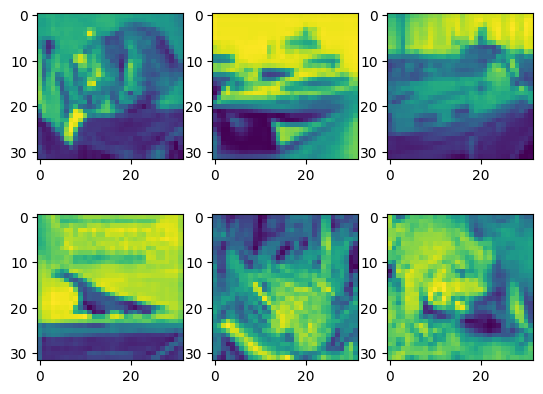

In [14]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(image[i][0])
plt.show()

# Building Neural Network

In [15]:
import torch.nn as nn

In [16]:
from os import X_OK
class CustomNeuralNetwork(nn.Module):
  def __init__(self):
    super(CustomNeuralNetwork,self).__init__()
    self.layer1=nn.Linear(3072,1500)
    self.layer2=nn.Linear(1500,750)
    self.layer3=nn.Linear(750,325)
    self.layer4=nn.Linear(325,180)
    self.layer5=nn.Linear(180,50)
    self.layer6=nn.Linear(50,10)

    self.sigmoid=nn.Sigmoid()
    self.relu=nn.ReLU()
    self.tanh=nn.Tanh()

  def forward(self,x):
    x=self.layer1(x)
    x=self.tanh(x)
    x=self.layer2(x)
    x=self.tanh(x)
    x=self.layer3(x)
    x=self.tanh(x)
    x=self.layer4(x)
    x=self.tanh(x)
    x=self.layer5(x)
    x=self.sigmoid(x)
    x=self.layer6(x)
    return x

In [17]:
model=CustomNeuralNetwork()

In [18]:
model=model.to('cuda')

In [19]:
print(model)

CustomNeuralNetwork(
  (layer1): Linear(in_features=3072, out_features=1500, bias=True)
  (layer2): Linear(in_features=1500, out_features=750, bias=True)
  (layer3): Linear(in_features=750, out_features=325, bias=True)
  (layer4): Linear(in_features=325, out_features=180, bias=True)
  (layer5): Linear(in_features=180, out_features=50, bias=True)
  (layer6): Linear(in_features=50, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (tanh): Tanh()
)


In [20]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.005)

# training loop

In [21]:
import time

In [22]:
start_time=time.time()
for epoch in range(5):
  total_loss=0
  for (images,labels) in train_loader:
    images=images.reshape(-1,3*32*32)
    images=images.to('cuda')
    labels=labels.to('cuda')
    predicted_label=model(images)
    loss=criterion(predicted_label,labels)
    optimizer.zero_grad()
    loss.backward()
    total_loss=total_loss+loss
  print(f"the model loss as epoch {epoch} is {total_loss}")

end_time=time.time()
print(f"total time for training the model is {end_time - start_time}")

the model loss as epoch 0 is 3626.11376953125
the model loss as epoch 1 is 3626.11376953125
the model loss as epoch 2 is 3626.11376953125
the model loss as epoch 3 is 3626.11376953125
the model loss as epoch 4 is 3626.11376953125
total time for training the model is 59.153326988220215


# model evaluation

In [23]:
model.eval()

CustomNeuralNetwork(
  (layer1): Linear(in_features=3072, out_features=1500, bias=True)
  (layer2): Linear(in_features=1500, out_features=750, bias=True)
  (layer3): Linear(in_features=750, out_features=325, bias=True)
  (layer4): Linear(in_features=325, out_features=180, bias=True)
  (layer5): Linear(in_features=180, out_features=50, bias=True)
  (layer6): Linear(in_features=50, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (tanh): Tanh()
)

In [24]:
import numpy as np

In [25]:
avg_acc=[]

In [26]:
with torch.no_grad():
  for (images,labels) in test_loader:
    total_correct=0
    n_sample=0
    model=model.to('cpu')
    images=images.reshape(-1,3*32*32)
    model_out=model(images)
    pred_out=torch.argmax(model_out,dim=1)
    n_sample=labels.size(0)
    total_correct=total_correct+(pred_out==labels).sum()
    accuracy=total_correct/n_sample*100
    avg_acc.append(accuracy)
  print(f"total accuracy is {np.array(avg_acc).mean()}")

total accuracy is 9.994009971618652


# predicting unknown CIFAR10 image

In [27]:
predicted_image=torch.argmax(model(test_dataset[20][0].reshape(-1,3*32*32)))

In [28]:
actual_image_label=test_dataset[20][1]

In [29]:
predicted_image

tensor(1)

In [30]:
actual_image_label

7